# K-Means法をスクラッチで

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## ダミーデータ生成関数の定義

In [2]:
def generate_2dim_normal(mean, variance, covariance, sample_size):
    cov = [[variance,covariance],
           [covariance,variance]]
    return np.random.multivariate_normal(mean, cov, sample_size)

In [3]:
cluster1 = generate_2dim_normal(mean = [0, 8], variance=1, covariance=0, sample_size=500)
cluster2 = generate_2dim_normal(mean = [-1, 0], variance=1, covariance=0, sample_size=500)
cluster3 = generate_2dim_normal(mean = [10, 10], variance=1, covariance=0, sample_size=300)
cluster4 = generate_2dim_normal(mean = [5, 5.5], variance=0.8, covariance=-0.1, sample_size=200)
data = np.vstack((cluster1, cluster2, cluster3, cluster4))

## 可視化用関数の定義

In [4]:
def cluster_visualize(data, cluster_labels, centers=None):

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]
    cluster_ids = list(set(cluster_labels))
    for k in range(len(cluster_ids)):
        cluster_id = cluster_ids[k]
        label_ = "clutser = %d"%cluster_id
        data_by_cluster = data[cluster_labels == cluster_id]
        ax.scatter(data_by_cluster[:,0], data_by_cluster[:,1], c=colorlist[k], label = label_)

    #重心を描く
    if centers is not None:
        ax.scatter(centers[:,0], centers[:,1], c=colorlist, s=64, edgecolors='black', marker='^')
        
    ax.set_title(u"Clustering(k=" + str(len(cluster_ids)) + ")")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.legend(loc='lower right')

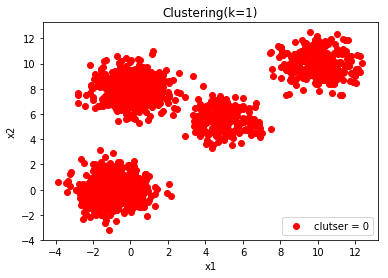

In [5]:
cluster_visualize(data, np.zeros(data.shape[0]))

## k-meansの実装

In [6]:
def euler_distance(a, b, axis=None):
    return np.linalg.norm(a - b, axis=axis)

def init_centers(data, k):
    idxs = np.random.randint(data.shape[0]+1, size=k)
    return data[idxs]

def get_cluster_labels(data, centers):
    dist = np.zeros((data.shape[0], centers.shape[0]))
    for i, center in enumerate(centers):
        dist[:,i] = euler_distance(data, center, axis=1)
    return np.argmin(dist, axis=1)

def calc_centers(data, cluster_labels, current_centers):
    new_centers = np.zeros_like(current_centers, dtype=float)
    for cluster_no, center in enumerate(current_centers):
        new_centers[cluster_no] = data[cluster_labels==cluster_no].mean(axis=0)
    return new_centers

def kmeans(data, k, max_iter=10):
    centers = init_centers(data, k)
    for _ in range(max_iter):
        cluster_labels = get_cluster_labels(data, centers)
        new_centers = calc_centers(data, cluster_labels, centers)
        if euler_distance(new_centers, centers) < 0.00001:
            break
        centers = new_centers
    return cluster_labels, centers

## 動作確認
k=2～8をループで確認

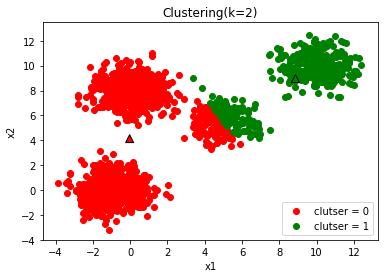

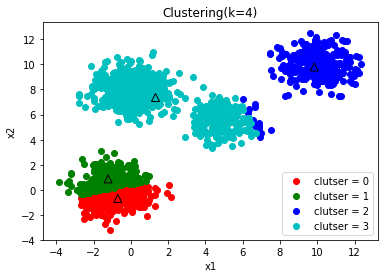

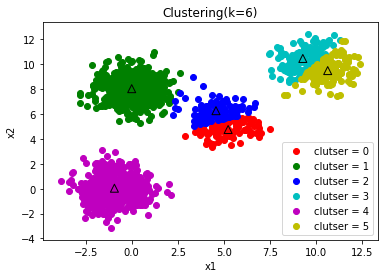

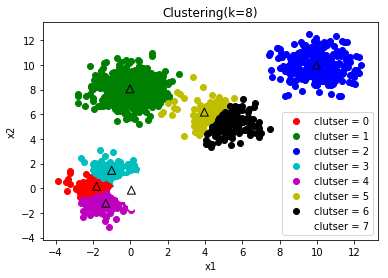

In [7]:
for k in range(2, 10, 2):
    cluster_labels, centers = kmeans(data, k, max_iter=10)
    cluster_visualize(data, cluster_labels, centers)

kmeansでは、ランダムに設定する初期値によりクラスタの仕方が変わってくる事がわかる。